In [1]:
from LSTM_module import measure_usage,LSTM_predictions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import psutil
import re
import time

# Use TensorFlow's Keras, not standalone Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , GRU, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

# AAPL

In [2]:
df_appl = pd.read_csv("AAPL.csv")

Columns:  Index(['Unnamed: 0', 'timestamp', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')
Data shape:  (3096, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3096 non-null   int64         
 1   timestamp   3096 non-null   datetime64[ns]
 2   Open        3096 non-null   float64       
 3   High        3096 non-null   float64       
 4   Low         3096 non-null   float64       
 5   Close       3096 non-null   float64       
 6   Adj Close   3096 non-null   float64       
 7   Volume      3096 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 193.6 KB
None
************************************************************
Train size : (2477, 2)
Test size : (679, 2)
************************************************************
Train and Test Size 

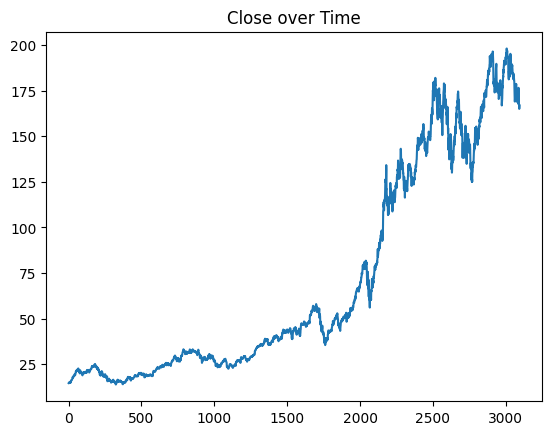

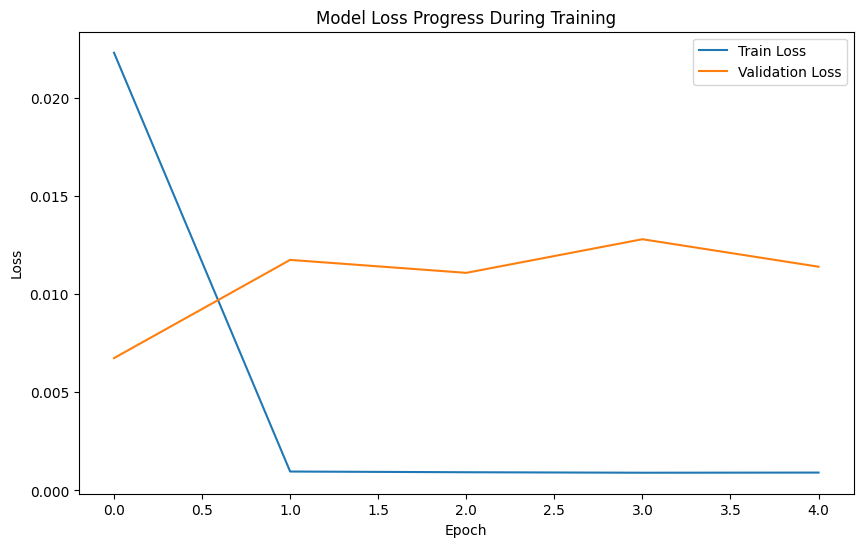

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Train MSE: 4.517326
Train RMSE: 2.1254
Train MAE: 1.3103662
Train MAPE: 2.9985539615154266
************************************************************
Test MSE: 58.097996
Test RMSE: 7.6222043
Test MAE: 6.363689
Test MAPE: 3.778354451060295


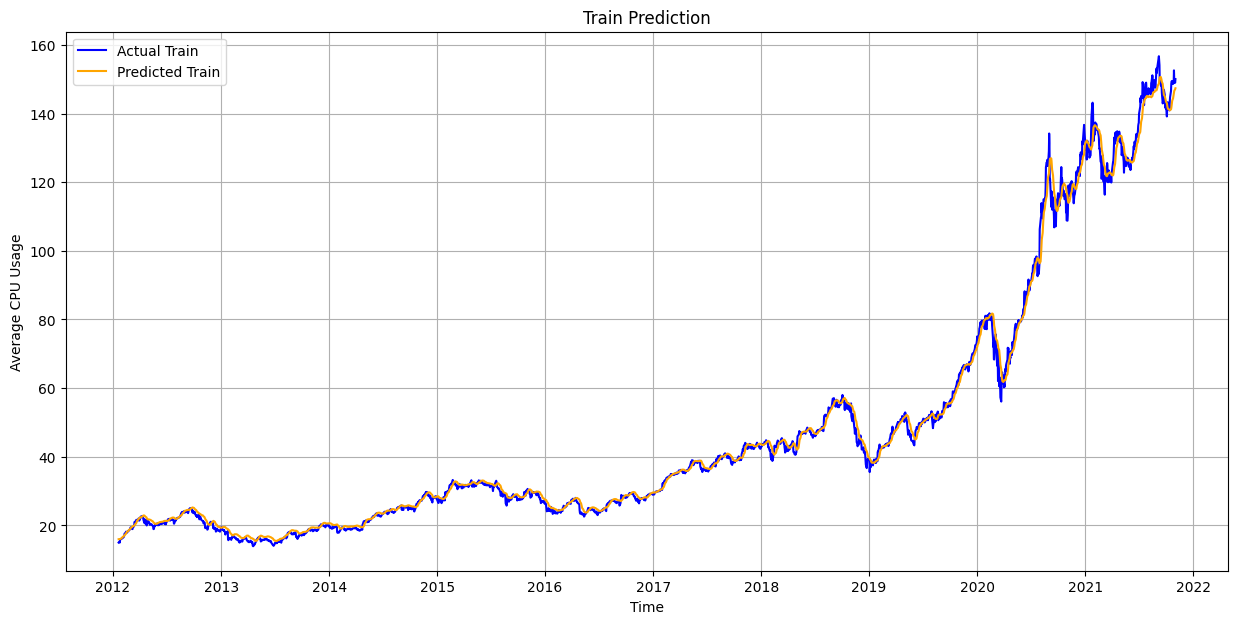

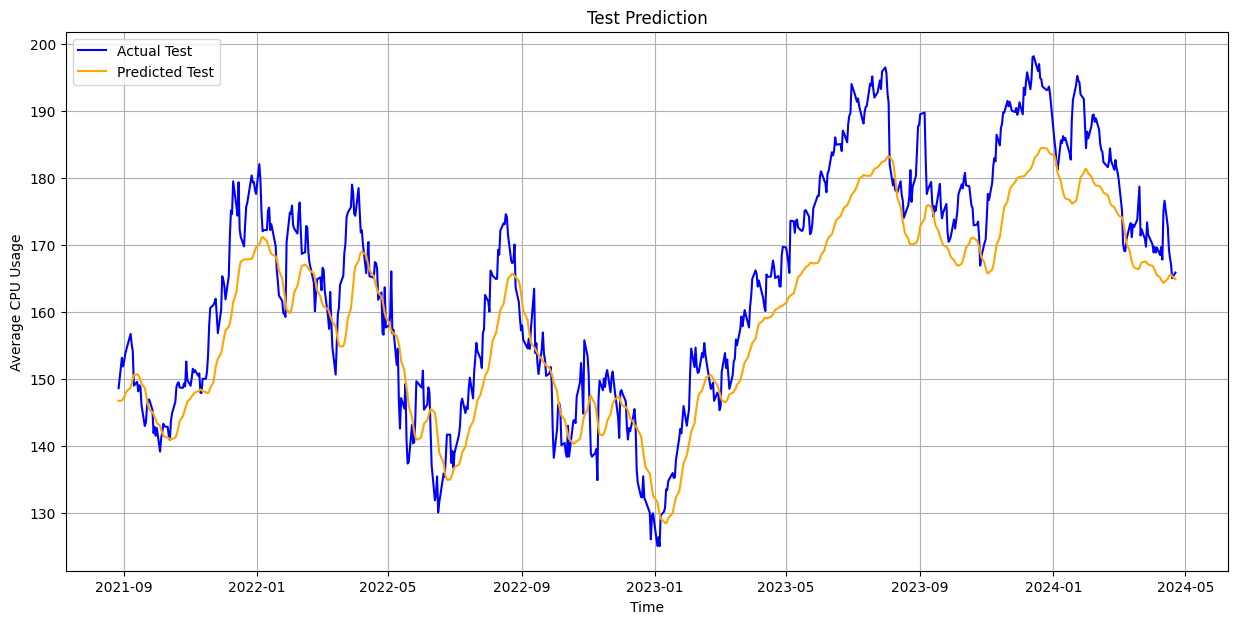

Function: run
CPU time used: 1.58 sec
Memory used: 113.40 MB
Execution time: 6.80 sec


In [3]:
appl = LSTM_predictions(df_appl,"Close","timestamp",epoch=5)
appl.run()

# AEP_hourly

In [4]:
df_aep = pd.read_csv("AEP_hourly.csv")

Columns:  Index(['Datetime', 'AEP_MW'], dtype='object')
Data shape:  (121273, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB
None
************************************************************
Train size : (97019, 2)
Test size : (24314, 2)
************************************************************
Train and Test Size after preprocessing: 
X_train shape:  (97006, 12, 1)
y_train shape:  (97006, 1)
X_test shape:  (24301, 12, 1)
y_test shape:  (24301, 1)
************************************************************
Epoch 1/5
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 2/5
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.0034 - val_loss: 0.

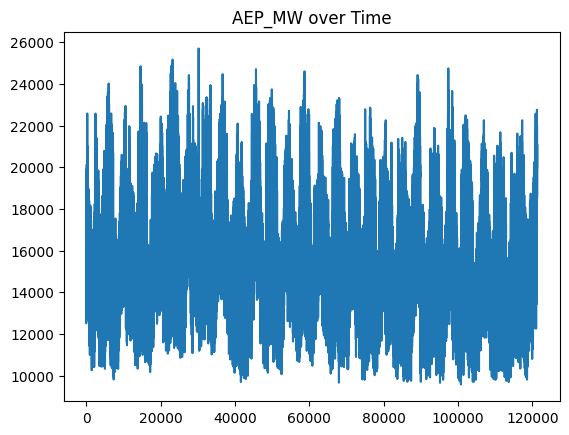

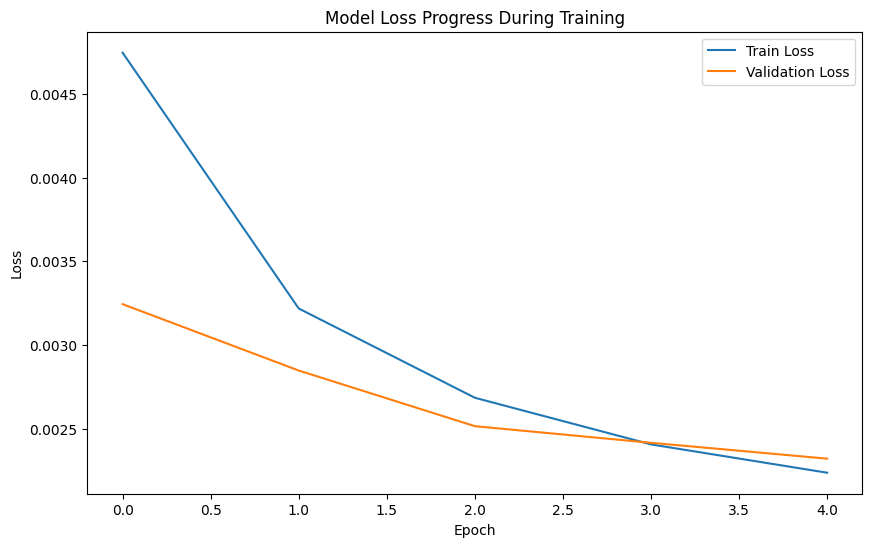

3032/3032 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Train MSE: 140064.38
Train RMSE: 374.25174
Train MAE: 233.41289
Train MAPE: 1.5420530922710896
************************************************************
Test MSE: 149090.58
Test RMSE: 386.1225
Test MAE: 233.57318
Test MAPE: 1.6135958954691887


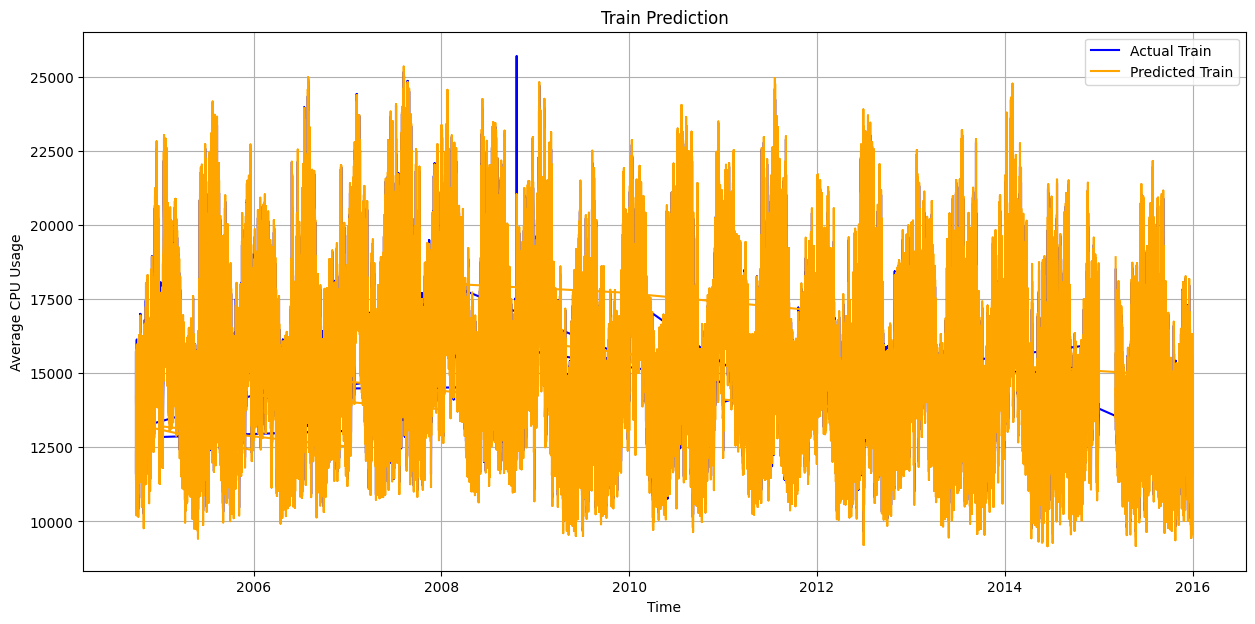

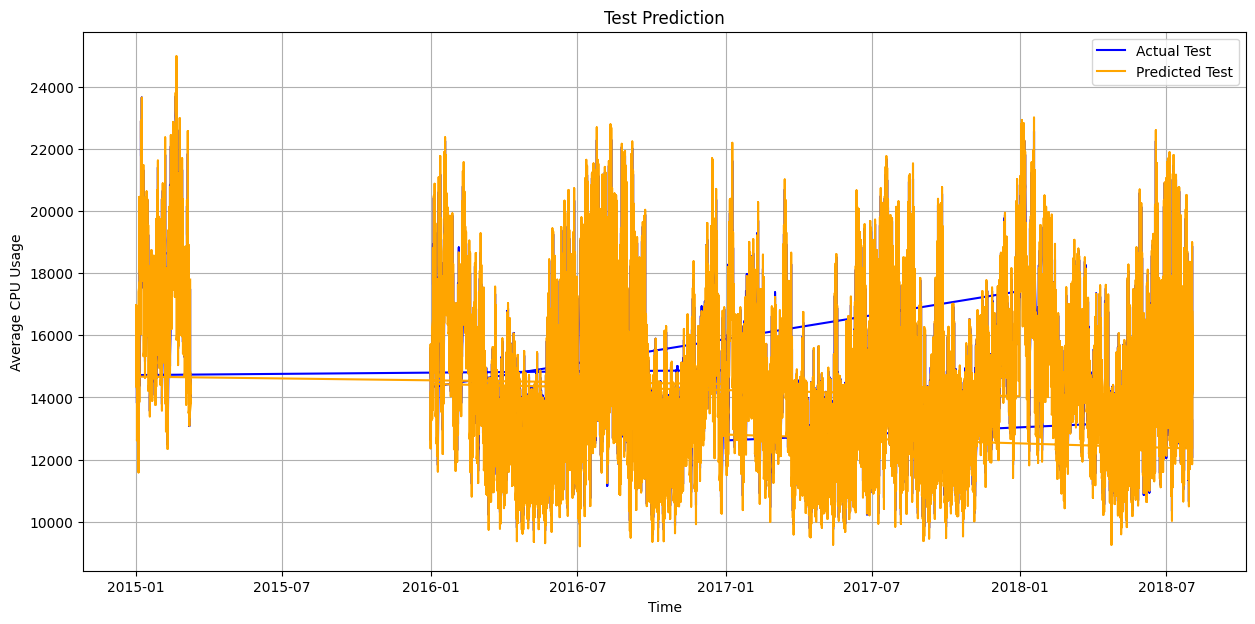

Function: run
CPU time used: 56.11 sec
Memory used: 175.09 MB
Execution time: 155.57 sec


In [5]:
aep = LSTM_predictions(df_aep,"AEP_MW","Datetime",epoch=5)
aep.run()

# Daily Temperature

In [6]:
df_temp = pd.read_csv("daily-minimum-temperatures-in-me.csv")

Columns:  Index(['Date', 'Daily minimum temperatures'], dtype='object')
Data shape:  (3650, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB
None
************************************************************
Train size : (2920, 2)
Test size : (790, 2)
************************************************************
Train and Test Size after preprocessing: 
X_train shape:  (2907, 12, 1)
y_train shape:  (2907, 1)
X_test shape:  (777, 12, 1)
y_test shape:  (777, 1)
************************************************************
Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0549 - val_loss: 0.0399
Epoch 2/5
91/91 ━

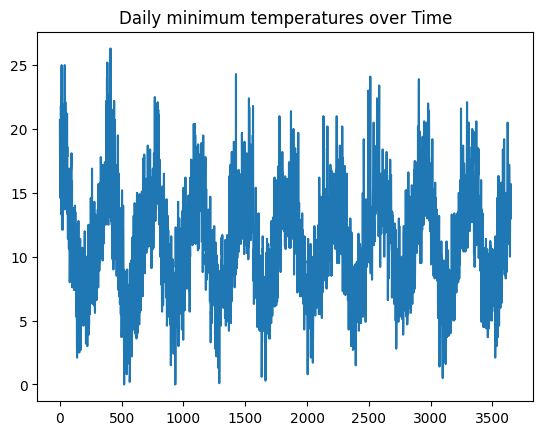

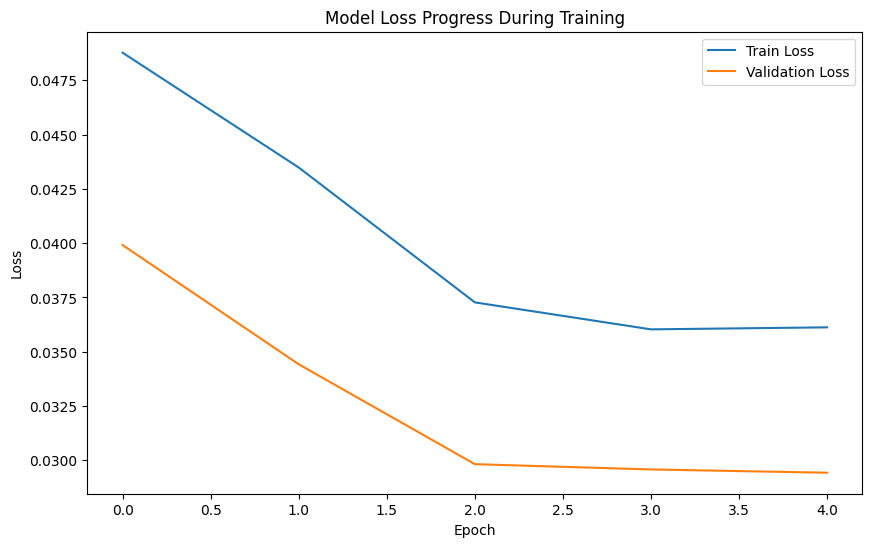

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train MSE: 6.113495
Train RMSE: 2.4725482
Train MAE: 1.9317397
Train MAPE: inf
************************************************************
Test MSE: 5.0881853
Test RMSE: 2.2557006
Test MAE: 1.7701026
Test MAPE: 20.619694888591766


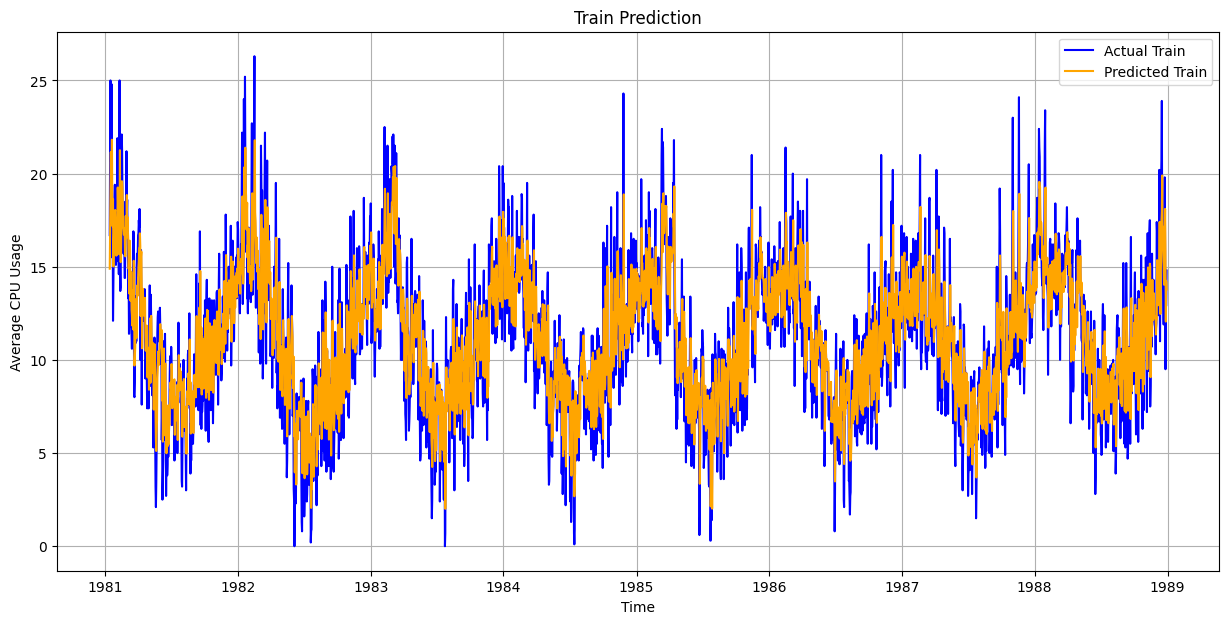

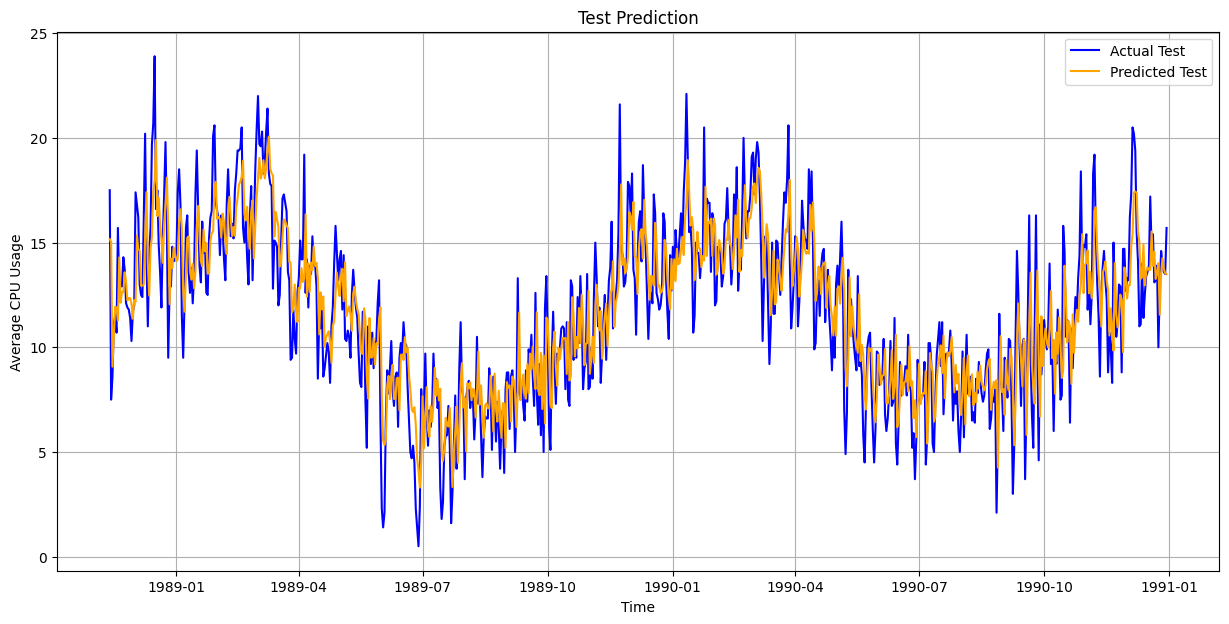

Function: run
CPU time used: 3.19 sec
Memory used: 86.18 MB
Execution time: 8.55 sec


In [8]:
temp = LSTM_predictions(df_temp,"Daily minimum temperatures","Date",epoch=5)
temp.run()

# Electric Consumption:

In [13]:
df_elec = pd.read_csv("Electric_Production.csv")

In [16]:
df_elec

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


Columns:  Index(['DATE', 'IPG2211A2N'], dtype='object')
Data shape:  (397, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB
None
************************************************************
Train size : (318, 2)
Test size : (139, 2)
************************************************************
Train and Test Size after preprocessing: 
X_train shape:  (305, 12, 1)
y_train shape:  (305, 1)
X_test shape:  (126, 12, 1)
y_test shape:  (126, 1)
************************************************************
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1366 - val_loss: 0.1120
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0713 - val_loss: 0.0962
Epoch 3/100
10/1

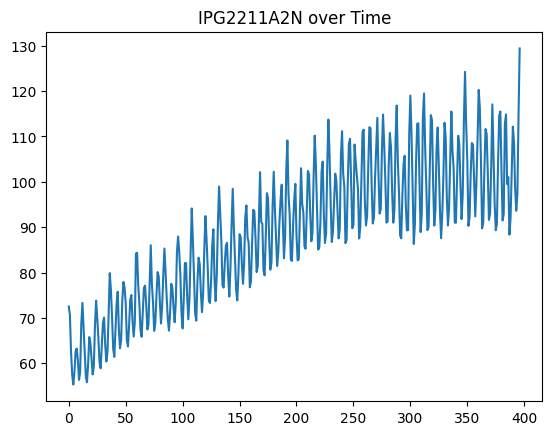

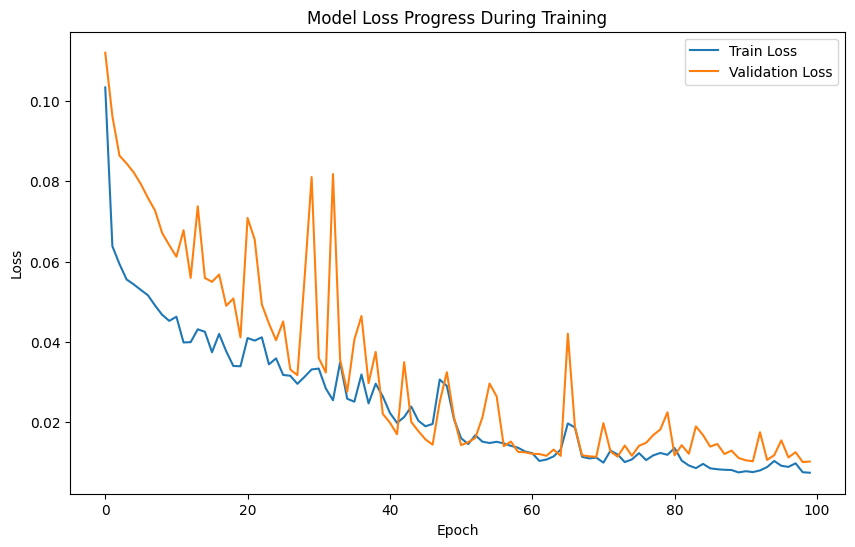

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train MSE: 7.555386
Train RMSE: 2.7487063
Train MAE: 2.1403553
Train MAPE: 2.488078363239765
************************************************************
Test MSE: 10.493568
Test RMSE: 3.2393777
Test MAE: 2.5299299
Test MAPE: 2.464262768626213


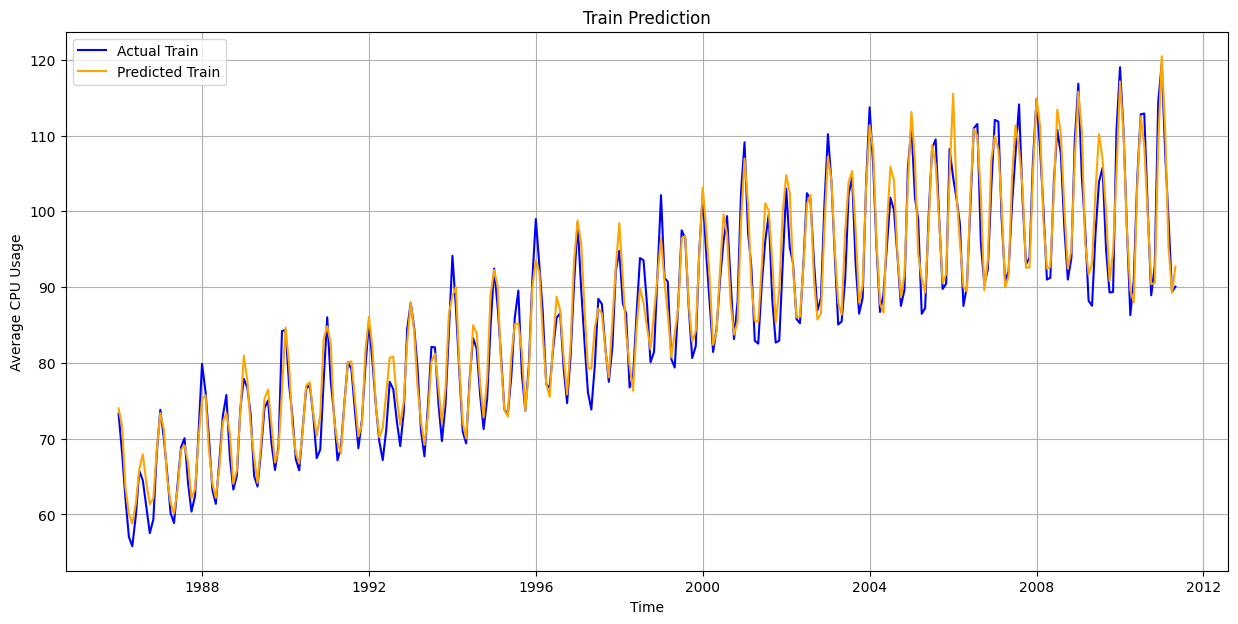

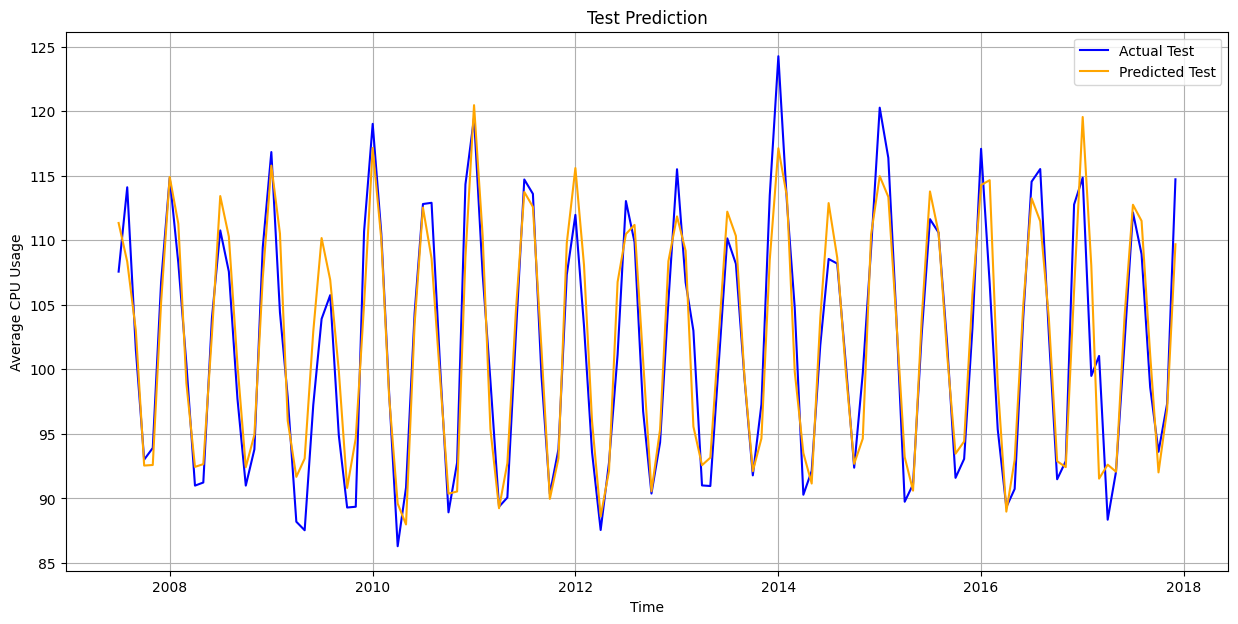

Function: run
CPU time used: 3.16 sec
Memory used: 62.78 MB
Execution time: 16.36 sec


In [18]:
elec = LSTM_predictions(df_elec,"IPG2211A2N","DATE",epoch=100)
elec.run()

# Azure

Columns:  Index(['timestamp', 'min cpu', 'max cpu', 'avg cpu'], dtype='object')
Data shape:  (8640, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8640 non-null   datetime64[ns]
 1   min cpu    8640 non-null   float64       
 2   max cpu    8640 non-null   float64       
 3   avg cpu    8640 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 270.1 KB
None
************************************************************
Train size : (6912, 2)
Test size : (1788, 2)
************************************************************
Train and Test Size after preprocessing: 
X_train shape:  (6899, 12, 1)
y_train shape:  (6899, 1)
X_test shape:  (1775, 12, 1)
y_test shape:  (1775, 1)
************************************************************
Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.

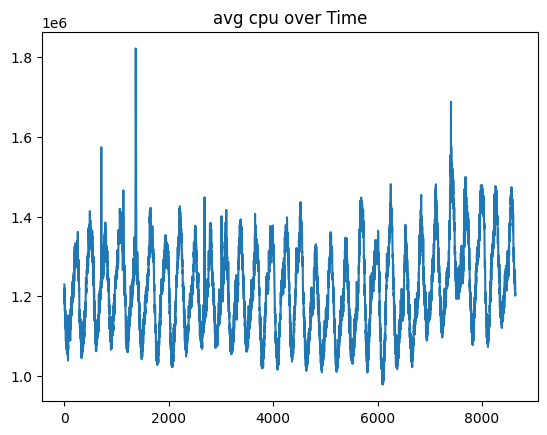

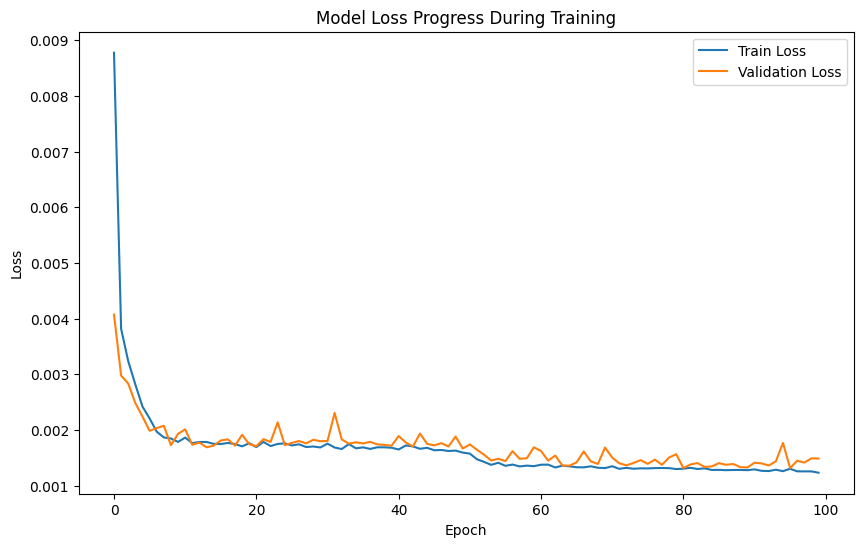

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train MSE: 218368140.0
Train RMSE: 14777.285
Train MAE: 10703.045
Train MAPE: 0.8872264064848423
************************************************************
Test MSE: 264376200.0
Test RMSE: 16259.649
Test MAE: 11662.303
Test MAPE: 0.9040140546858311


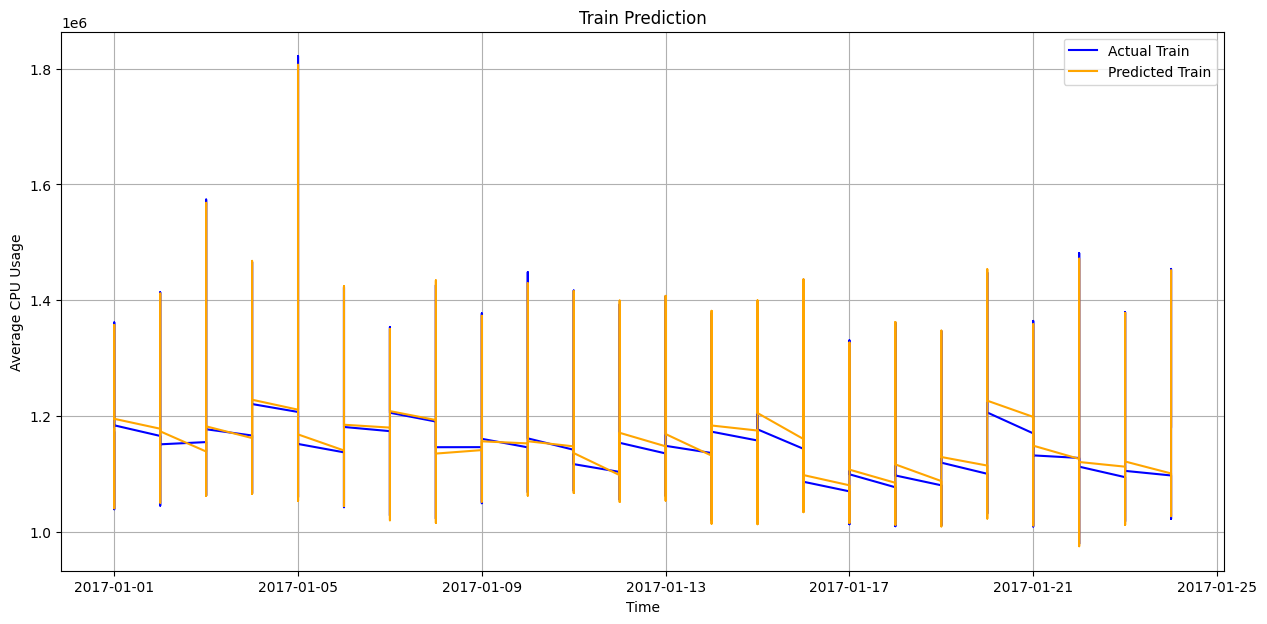

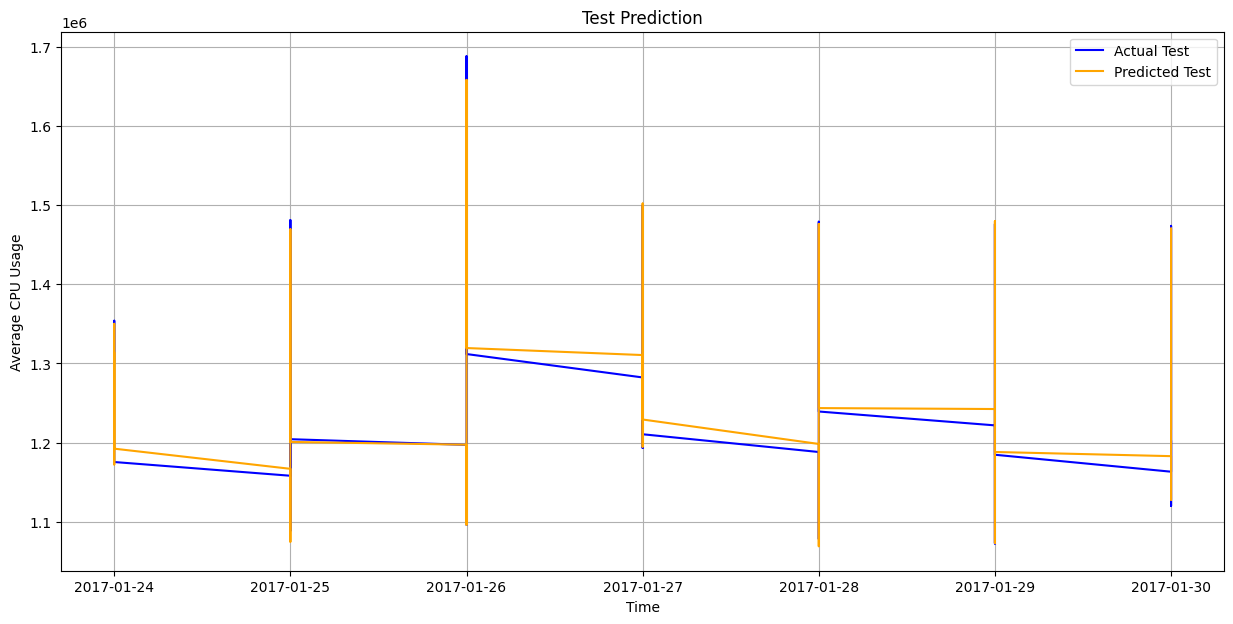

Function: run
CPU time used: 65.03 sec
Memory used: 25.61 MB
Execution time: 187.77 sec


In [20]:
df_azure = pd.read_csv("azure.csv")
azure = LSTM_predictions(df_azure,"avg cpu",epoch=100)
azure.run()    